# Análisis PASO 5: Descarga Ticks E0 (2004-2025)

**Fecha**: 2025-10-27  
**Objetivo**: Auditoría completa de la descarga de ticks para eventos E0

## Resumen Ejecutivo

- **Eventos E0**: 29,555 ticker-días (RVOL≥2.0, |%chg|≥15%, $vol≥$5M)
- **Event window**: ±1 día (3 días por evento)
- **Días objetivo**: 82,012 ticker-días total
- **Tickers únicos**: 4,898
- **Período**: 2004-01-01 → 2025-10-21 (21 años)

In [1]:
import polars as pl
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
from collections import defaultdict, Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Paths - ABSOLUTOS desde project root
project_root = Path(r"D:\04_TRADING_SMALLCAPS")
trades_dir = project_root / "raw" / "polygon" / "trades"
watchlists_dir = project_root / "processed" / "universe" / "info_rich" / "daily"

print("Entorno configurado correctamente")
print(f"Project root: {project_root}")
print(f"Trades dir: {trades_dir}")
print(f"Watchlists dir: {watchlists_dir}")

Entorno configurado correctamente
Project root: D:\04_TRADING_SMALLCAPS
Trades dir: D:\04_TRADING_SMALLCAPS\raw\polygon\trades
Watchlists dir: D:\04_TRADING_SMALLCAPS\processed\universe\info_rich\daily


## 1. Análisis de Eventos E0 (Watchlists)

In [2]:
# Cargar todos los watchlists
print("Cargando watchlists...")
watchlist_files = sorted(watchlists_dir.glob('date=*/watchlist.parquet'))
print(f"Total watchlists encontrados: {len(watchlist_files):,}")

# Extraer eventos E0
e0_events = []
for wf in watchlist_files:
    try:
        df = pl.read_parquet(wf)
        e0_df = df.filter(pl.col('info_rich') == True)
        if len(e0_df) > 0:
            date_str = wf.parent.name.split('=')[1]
            for row in e0_df.iter_rows(named=True):
                e0_events.append({
                    'ticker': row['ticker'],
                    'trading_day': date_str,
                    'rvol30': row['rvol30'],
                    'pctchg_d': row['pctchg_d'],
                    'dollar_vol_d': row['dollar_vol_d'],
                    'close_d': row['close_d']
                })
    except Exception as e:
        print(f"Error leyendo {wf}: {e}")

# Convertir a DataFrame
e0_df = pl.DataFrame(e0_events)
print(f"\nEventos E0 totales: {len(e0_df):,}")
print(f"Tickers únicos con E0: {e0_df['ticker'].n_unique():,}")
print(f"Días únicos con E0: {e0_df['trading_day'].n_unique():,}")

# Estadísticas descriptivas
print("\n" + "="*80)
print("ESTADÍSTICAS EVENTOS E0")
print("="*80)
print(e0_df.describe())

Cargando watchlists...


Total watchlists encontrados: 5,934



Eventos E0 totales: 29,555
Tickers únicos con E0: 4,898
Días únicos con E0: 4,949

ESTADÍSTICAS EVENTOS E0
shape: (9, 7)
┌────────────┬────────┬─────────────┬───────────┬────────────┬──────────────┬──────────┐
│ statistic  ┆ ticker ┆ trading_day ┆ rvol30    ┆ pctchg_d   ┆ dollar_vol_d ┆ close_d  │
│ ---        ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ ---          ┆ ---      │
│ str        ┆ str    ┆ str         ┆ f64       ┆ f64        ┆ f64          ┆ f64      │
╞════════════╪════════╪═════════════╪═══════════╪════════════╪══════════════╪══════════╡
│ count      ┆ 29555  ┆ 29555       ┆ 29555.0   ┆ 29555.0    ┆ 29555.0      ┆ 29555.0  │
│ null_count ┆ 0      ┆ 0           ┆ 0.0       ┆ 0.0        ┆ 0.0          ┆ 0.0      │
│ mean       ┆ null   ┆ null        ┆ 9.126838  ┆ 0.226033   ┆ 8.2793e7     ┆ 7.455289 │
│ std        ┆ null   ┆ null        ┆ 7.640927  ┆ 3.583615   ┆ 2.2730e8     ┆ 5.290375 │
│ min        ┆ AABA   ┆ 2004-01-06  ┆ 2.000118  ┆ -0.993025  ┆ 5.0019e6     ┆

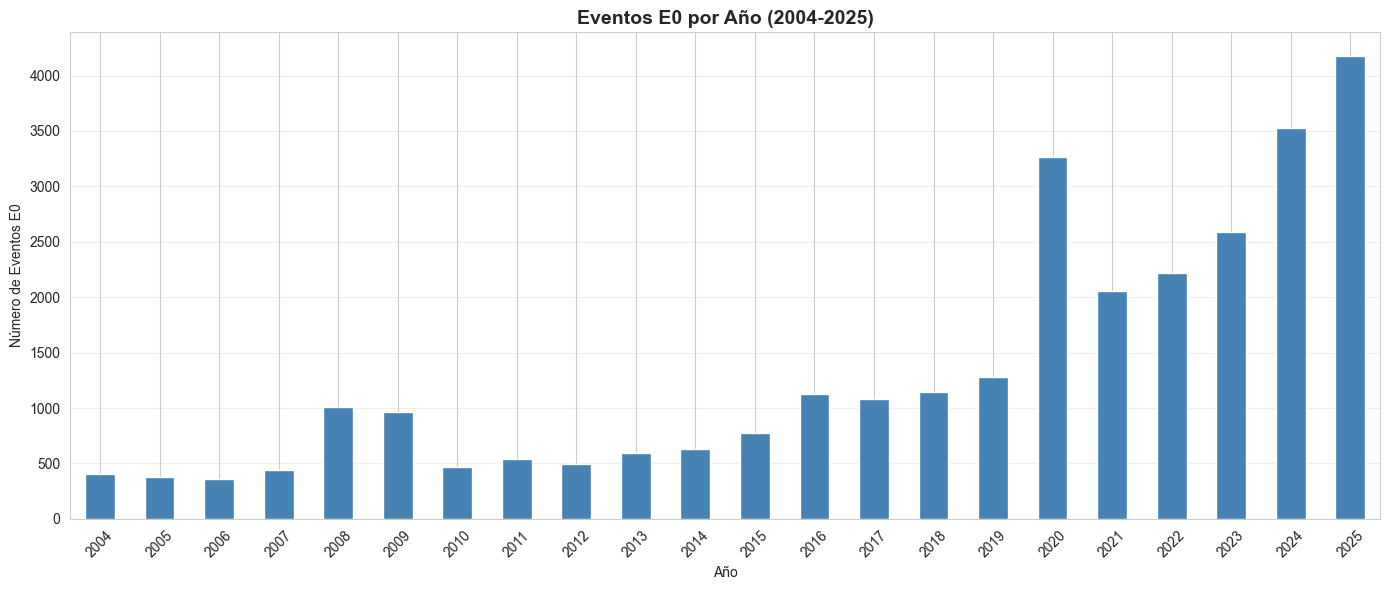


Eventos E0 por año:
year
2004     407
2005     375
2006     362
2007     442
2008    1014
2009     966
2010     472
2011     536
2012     494
2013     597
2014     633
2015     776
2016    1127
2017    1086
2018    1148
2019    1284
2020    3267
2021    2053
2022    2220
2023    2588
2024    3527
2025    4181
dtype: int64


In [3]:
# Distribución temporal de eventos E0
e0_df_pd = e0_df.to_pandas()
e0_df_pd['year'] = e0_df_pd['trading_day'].str[:4]

events_by_year = e0_df_pd.groupby('year').size().sort_index()

plt.figure(figsize=(14, 6))
events_by_year.plot(kind='bar', color='steelblue')
plt.title('Eventos E0 por Año (2004-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Eventos E0')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('eventos_e0_por_año.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nEventos E0 por año:")
print(events_by_year)


EVENTOS E0 vs TAMAÑO DEL UNIVERSO POR AÑO

Cargando TODOS los watchlists (universo completo)...



Año      Eventos E0     Tickers Universo     % con E0
--------------------------------------------------------
2004            407                1,679        24.2%
2005            375                1,639        22.9%
2006            362                1,551        23.3%
2007            442                1,604        27.6%
2008          1,014                2,148        47.2%
2009            966                2,123        45.5%
2010            472                1,849        25.5%
2011            536                1,808        29.6%
2012            494                1,816        27.2%
2013            597                1,748        34.2%
2014            633                1,779        35.6%
2015            776                1,965        39.5%
2016          1,127                2,140        52.7%
2017          1,086                1,956        55.5%
2018          1,148                2,029        56.6%
2019          1,284                2,078        61.8%
2020          3,267     

  Tickers únicos (todo el periodo): 7,948


C:\Users\AlexJ\AppData\Local\Temp\ipykernel_13040\3088994612.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(comparison_pd['year'], rotation=45, ha='right')


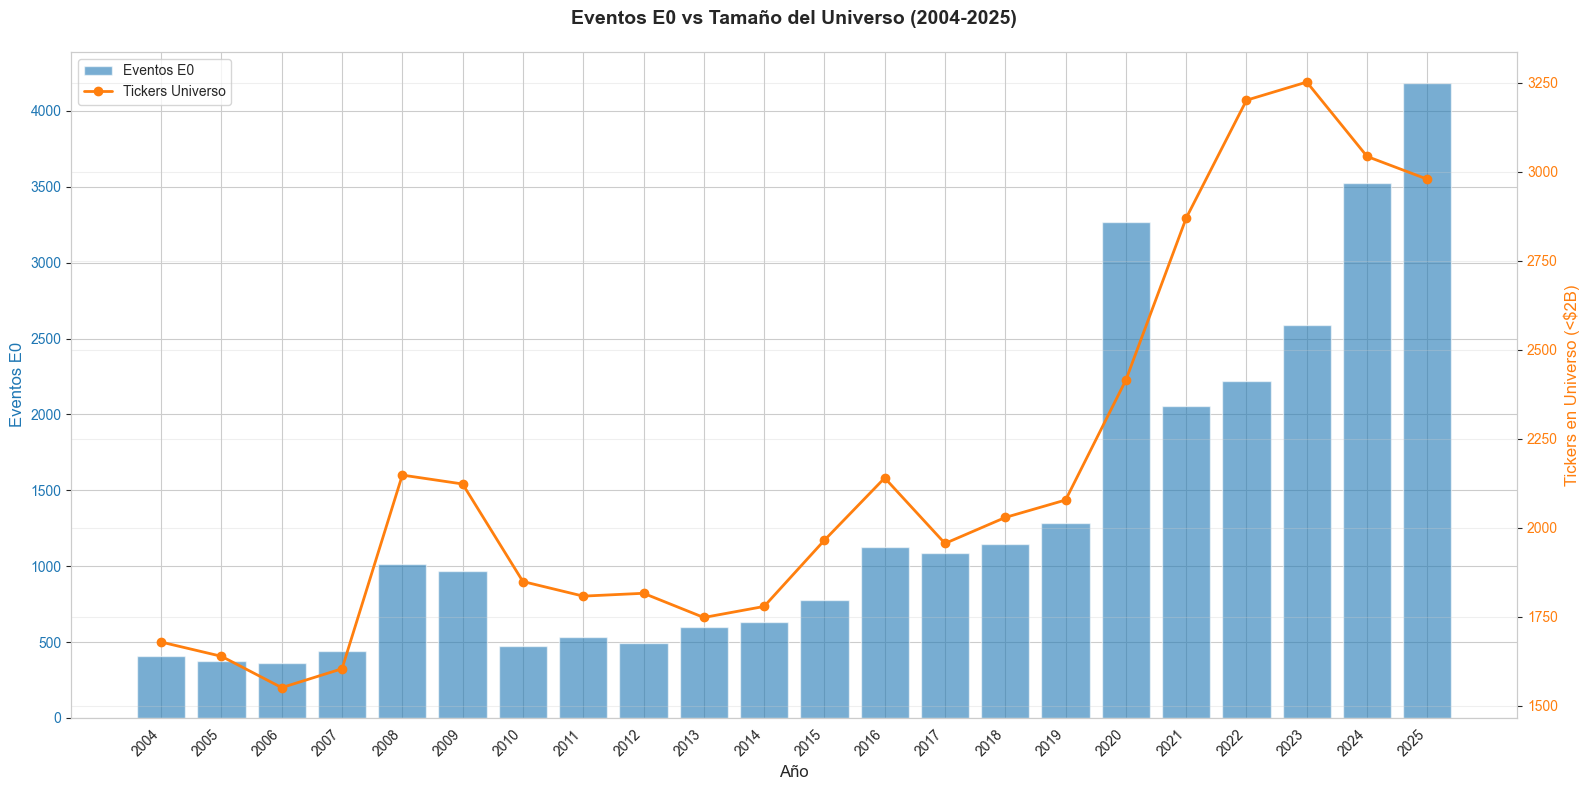


✅ Gráfico guardado: eventos_e0_vs_universo.png


In [4]:
# AÑADIR: Calcular tamaño del universo por año
print("\n" + "="*80)
print("EVENTOS E0 vs TAMAÑO DEL UNIVERSO POR AÑO")
print("="*80)

# Cargar TODOS los watchlists (info_rich=True Y False)
print("\nCargando TODOS los watchlists (universo completo)...")
all_watchlist_data = []
for wf in watchlist_files:
    try:
        date_str = wf.parent.name.split('=')[1]
        df = pl.read_parquet(wf)
        df = df.with_columns(pl.lit(date_str).alias('date'))
        all_watchlist_data.append(df)
    except Exception as e:
        continue

df_universe = pl.concat(all_watchlist_data)

# Extraer año
df_universe = df_universe.with_columns(
    pl.col('date').str.slice(0, 4).alias('year')
)

# Eventos E0 por año (ya lo tenemos)
e0_by_year_pl = (df_universe
    .filter(pl.col('info_rich') == True)
    .group_by('year')
    .agg(pl.count('ticker').alias('eventos_e0'))
    .sort('year')
)

# Tickers UNICOS en el universo por año (TODOS los tickers)
tickers_by_year = (df_universe
    .group_by('year')
    .agg(pl.col('ticker').n_unique().alias('tickers_universo'))
    .sort('year')
)

# JOIN
comparison_df = e0_by_year_pl.join(tickers_by_year, on='year', how='left')

# Mostrar tabla
print(f"\n{'Año':<6} {'Eventos E0':>12} {'Tickers Universo':>20} {'% con E0':>12}")
print('-'*56)

for row in comparison_df.iter_rows(named=True):
    year = row['year']
    e0 = row['eventos_e0']
    tickers = row['tickers_universo']
    pct = (e0 / tickers * 100) if tickers > 0 else 0
    print(f'{year:<6} {e0:>12,} {tickers:>20,} {pct:>11.1f}%')

print()
print(f"TOTALES:")
print(f"  Total eventos E0: {comparison_df['eventos_e0'].sum():,}")
print(f"  Tickers únicos (todo el periodo): {df_universe['ticker'].n_unique():,}")

# Crear gráfico comparativo
comparison_pd = comparison_df.to_pandas()

fig, ax1 = plt.subplots(figsize=(16, 8))

# Eje izquierdo: Eventos E0
color = 'tab:blue'
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Eventos E0', color=color, fontsize=12)
bars1 = ax1.bar(comparison_pd['year'], comparison_pd['eventos_e0'], 
                color=color, alpha=0.6, label='Eventos E0')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(comparison_pd['year'], rotation=45, ha='right')

# Eje derecho: Tickers en el universo
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Tickers en Universo (<$2B)', color=color, fontsize=12)
line2 = ax2.plot(comparison_pd['year'], comparison_pd['tickers_universo'], 
                 color=color, marker='o', linewidth=2, markersize=6, 
                 label='Tickers Universo')
ax2.tick_params(axis='y', labelcolor=color)

# Título y leyenda
plt.title('Eventos E0 vs Tamaño del Universo (2004-2025)', 
          fontsize=14, fontweight='bold', pad=20)

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('eventos_e0_vs_universo.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico guardado: eventos_e0_vs_universo.png")


TOP 20 Tickers con más Eventos E0:
shape: (20, 2)
┌────────┬────────────┐
│ ticker ┆ eventos_e0 │
│ ---    ┆ ---        │
│ str    ┆ u32        │
╞════════╪════════════╡
│ BCRX   ┆ 63         │
│ GERN   ┆ 53         │
│ VXRT   ┆ 51         │
│ SRNE   ┆ 50         │
│ BLDP   ┆ 43         │
│ …      ┆ …          │
│ CLNE   ┆ 38         │
│ VERI   ┆ 37         │
│ ATOS   ┆ 36         │
│ IMGN   ┆ 36         │
│ KERX   ┆ 36         │
└────────┴────────────┘


C:\Users\AlexJ\AppData\Local\Temp\ipykernel_13040\1712532518.py:3: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias('eventos_e0')


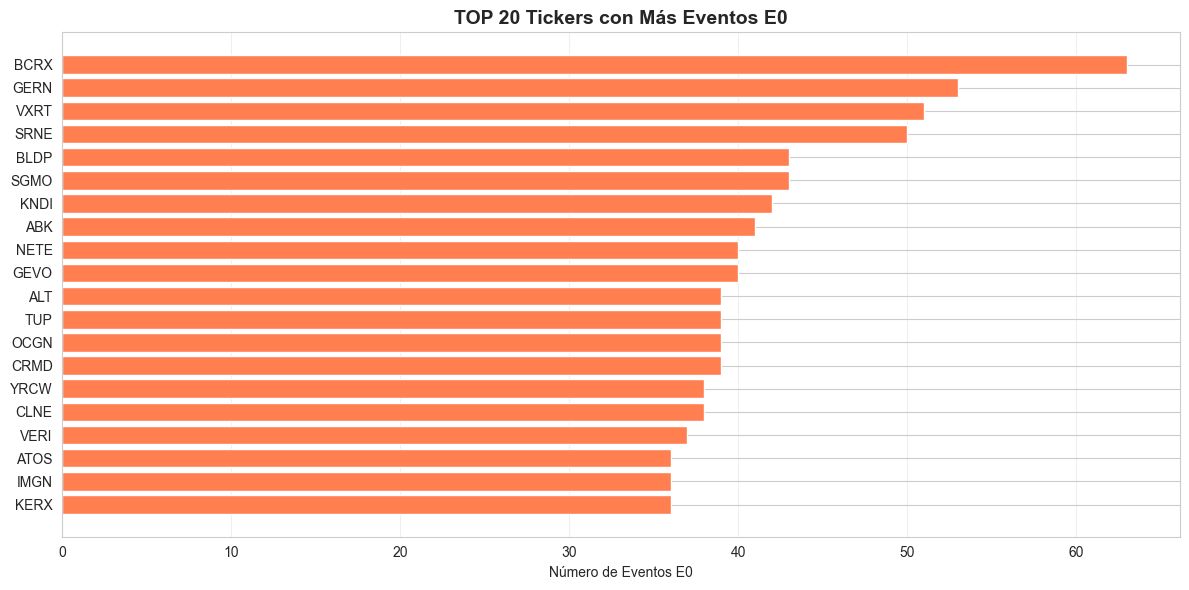

In [5]:
# TOP 20 tickers con más eventos E0
top_tickers = e0_df.group_by('ticker').agg(
    pl.count().alias('eventos_e0')
).sort('eventos_e0', descending=True).head(20)

print("\nTOP 20 Tickers con más Eventos E0:")
print(top_tickers)

# Visualización
top_tickers_pd = top_tickers.to_pandas()
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_tickers_pd)), top_tickers_pd['eventos_e0'], color='coral')
plt.yticks(range(len(top_tickers_pd)), top_tickers_pd['ticker'])
plt.xlabel('Número de Eventos E0')
plt.title('TOP 20 Tickers con Más Eventos E0', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top20_tickers_e0.png', dpi=150, bbox_inches='tight')
plt.show()

## 2. Análisis de Descargas Completadas

In [6]:
# Contar archivos descargados
print("Analizando archivos descargados...")

success_files = list(trades_dir.rglob('_SUCCESS'))
trades_files = list(trades_dir.rglob('trades.parquet'))
ticker_dirs = [d for d in trades_dir.iterdir() if d.is_dir()]

print(f"\nDías completados (_SUCCESS): {len(success_files):,}")
print(f"Archivos trades.parquet: {len(trades_files):,}")
print(f"Tickers con descargas: {len(ticker_dirs):,}")

# Calcular cobertura
target_days = 82_012
coverage_pct = (len(success_files) / target_days) * 100
print(f"\nCobertura: {coverage_pct:.1f}% ({len(success_files):,} / {target_days:,} días)")

Analizando archivos descargados...



Días completados (_SUCCESS): 67,439
Archivos trades.parquet: 67,439
Tickers con descargas: 4,875

Cobertura: 82.2% (67,439 / 82,012 días)


In [7]:
# Calcular tamaño total
print("\nCalculando tamaño de descarga...")

def get_file_size(path):
    try:
        return path.stat().st_size
    except:
        return 0

def format_size(bytes_size):
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if bytes_size < 1024.0:
            return f"{bytes_size:.2f} {unit}"
        bytes_size /= 1024.0
    return f"{bytes_size:.2f} PB"

total_size = 0
size_by_ticker = {}

for ticker_dir in ticker_dirs:
    ticker_size = 0
    for tf in ticker_dir.rglob('trades.parquet'):
        size = get_file_size(tf)
        ticker_size += size
        total_size += size
    
    if ticker_size > 0:
        size_by_ticker[ticker_dir.name] = ticker_size

total_gb = total_size / (1024**3)
total_tb = total_gb / 1024

print(f"Tamaño total descargado: {format_size(total_size)}")
print(f"                        {total_gb:.2f} GB")
print(f"                        {total_tb:.3f} TB")

if len(success_files) > 0:
    avg_size_per_day = total_size / len(success_files)
    print(f"\nTamaño promedio/día: {format_size(avg_size_per_day)}")
    
    # Proyección
    projected_total = avg_size_per_day * target_days
    projected_gb = projected_total / (1024**3)
    
    print(f"\nPROYECCIÓN FINAL (si se completa 100%):")
    print(f"  Tamaño proyectado: {format_size(projected_total)} ({projected_gb:.2f} GB)")
    
    # Comparación
    original_estimate_gb = 2600
    difference = projected_gb - original_estimate_gb
    difference_pct = (difference / original_estimate_gb) * 100
    
    print(f"\n  Estimación original C.5: 2,600 GB")
    print(f"  Diferencia: {difference:+,.0f} GB ({difference_pct:+.1f}%)")


Calculando tamaño de descarga...


Tamaño total descargado: 16.58 GB
                        16.58 GB
                        0.016 TB

Tamaño promedio/día: 257.77 KB

PROYECCIÓN FINAL (si se completa 100%):
  Tamaño proyectado: 20.16 GB (20.16 GB)

  Estimación original C.5: 2,600 GB
  Diferencia: -2,580 GB (-99.2%)



TOP 10 Tickers por Tamaño de Descarga:
   1. v2_2004_2019: 413.35 MB
   2. TLRY  : 54.26 MB
   3. BBBY  : 51.98 MB
   4. OCGN  : 47.82 MB
   5. BCRX  : 46.37 MB
   6. GEVO  : 42.50 MB
   7. SNDL  : 42.50 MB
   8. ALT   : 39.92 MB
   9. WOLF  : 39.37 MB
  10. HTZ   : 37.33 MB


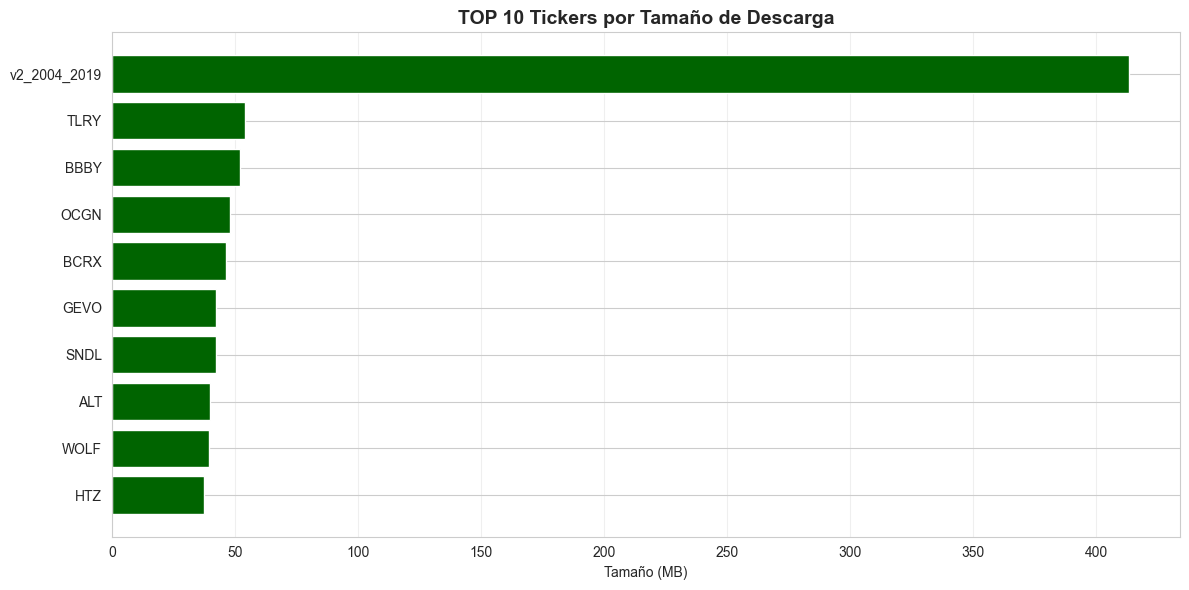

In [8]:
# TOP 10 tickers por tamaño de descarga
sorted_sizes = sorted(size_by_ticker.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTOP 10 Tickers por Tamaño de Descarga:")
for i, (ticker, size) in enumerate(sorted_sizes, 1):
    print(f"  {i:2d}. {ticker:6s}: {format_size(size)}")

# Visualización
if sorted_sizes:
    tickers = [t[0] for t in sorted_sizes]
    sizes_mb = [t[1] / (1024**2) for t in sorted_sizes]
    
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(tickers)), sizes_mb, color='darkgreen')
    plt.yticks(range(len(tickers)), tickers)
    plt.xlabel('Tamaño (MB)')
    plt.title('TOP 10 Tickers por Tamaño de Descarga', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('top10_tickers_size.png', dpi=150, bbox_inches='tight')
    plt.show()

## 3. Análisis de Ticks (Sample)

In [9]:
# Analizar conteo de ticks en sample de archivos
print("Analizando estadísticas de ticks (sample)...")

sample_size = min(100, len(trades_files))
sample_files = random.sample(trades_files, sample_size)

tick_stats = []
for tf in sample_files:
    try:
        df = pl.read_parquet(tf)
        ticker = tf.parent.parent.name
        date = tf.parent.name.split('=')[1]
        
        tick_stats.append({
            'ticker': ticker,
            'date': date,
            'ticks': len(df),
            'file_size': get_file_size(tf)
        })
    except Exception as e:
        continue

ticks_df = pl.DataFrame(tick_stats)

print(f"\nArchivos analizados: {len(ticks_df)}")
print(f"Total ticks (sample): {ticks_df['ticks'].sum():,}")
print(f"\nEstadísticas de ticks por día:")
print(ticks_df.describe())

Analizando estadísticas de ticks (sample)...



Archivos analizados: 100
Total ticks (sample): 1,405,764

Estadísticas de ticks por día:
shape: (9, 5)
┌────────────┬────────┬────────────┬──────────────┬───────────────┐
│ statistic  ┆ ticker ┆ date       ┆ ticks        ┆ file_size     │
│ ---        ┆ ---    ┆ ---        ┆ ---          ┆ ---           │
│ str        ┆ str    ┆ str        ┆ f64          ┆ f64           │
╞════════════╪════════╪════════════╪══════════════╪═══════════════╡
│ count      ┆ 100    ┆ 100        ┆ 100.0        ┆ 100.0         │
│ null_count ┆ 0      ┆ 0          ┆ 0.0          ┆ 0.0           │
│ mean       ┆ null   ┆ null       ┆ 14057.64     ┆ 232481.3      │
│ std        ┆ null   ┆ null       ┆ 19633.714788 ┆ 319294.037333 │
│ min        ┆ AERI   ┆ 2004-06-10 ┆ 91.0         ┆ 4839.0        │
│ 25%        ┆ null   ┆ null       ┆ 2542.0       ┆ 47484.0       │
│ 50%        ┆ null   ┆ null       ┆ 8548.0       ┆ 125518.0      │
│ 75%        ┆ null   ┆ null       ┆ 15688.0      ┆ 275816.0      │
│ max       

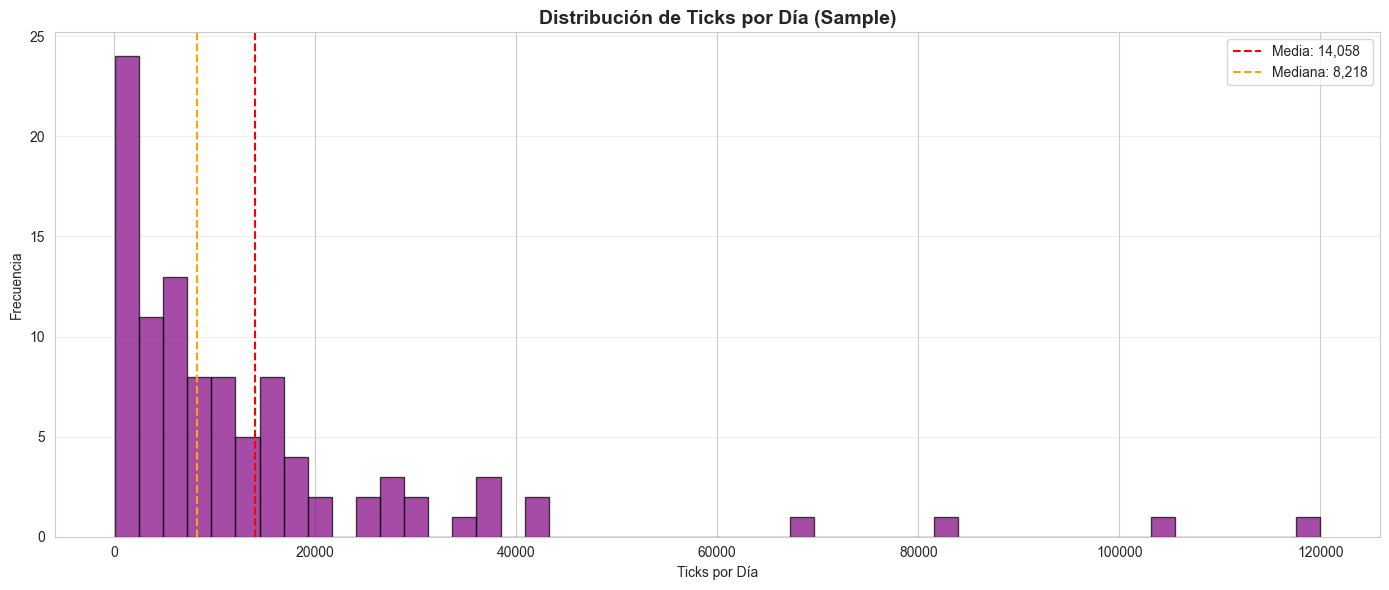


Mínimo ticks/día: 91
Máximo ticks/día: 119,927
Media ticks/día: 14,058
Mediana ticks/día: 8,218


In [10]:
# Distribución de ticks por día
ticks_pd = ticks_df.to_pandas()

plt.figure(figsize=(14, 6))
plt.hist(ticks_pd['ticks'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel('Ticks por Día')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ticks por Día (Sample)', fontsize=14, fontweight='bold')
plt.axvline(ticks_pd['ticks'].mean(), color='red', linestyle='--', label=f"Media: {ticks_pd['ticks'].mean():,.0f}")
plt.axvline(ticks_pd['ticks'].median(), color='orange', linestyle='--', label=f"Mediana: {ticks_pd['ticks'].median():,.0f}")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('distribucion_ticks.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nMínimo ticks/día: {ticks_pd['ticks'].min():,}")
print(f"Máximo ticks/día: {ticks_pd['ticks'].max():,}")
print(f"Media ticks/día: {ticks_pd['ticks'].mean():,.0f}")
print(f"Mediana ticks/día: {ticks_pd['ticks'].median():,.0f}")

# Seleccionar 5 tickers random con eventos E0
tickers_with_e0 = e0_df['ticker'].unique().to_list()
random_tickers = random.sample(tickers_with_e0, min(5, len(tickers_with_e0)))

print("="*80)
print("VERIFICACIÓN DETALLADA DE EVENT WINDOWS (5 TICKERS RANDOM)")
print("="*80)

for ticker in random_tickers:
    print(f"\n{'='*80}")
    print(f"TICKER: {ticker}")
    print(f"{'='*80}")
    
    # Obtener eventos E0 de este ticker
    ticker_e0 = e0_df.filter(pl.col('ticker') == ticker).sort('trading_day')
    
    print(f"\nEventos E0 para {ticker}: {len(ticker_e0)}")
    
    # Mostrar todos los eventos E0
    print(f"\nFechas E0:")
    for row in ticker_e0.iter_rows(named=True):
        print(f"  {row['trading_day']}: RVOL={row['rvol30']:.2f}, %chg={row['pctchg_d']:.2%}, $vol=${row['dollar_vol_d']/1e6:.1f}M")
    
    # Verificar archivos descargados
    ticker_dir = trades_dir / ticker
    if not ticker_dir.exists():
        print(f"\n⚠️  WARNING: Directorio {ticker} no existe!")
        continue
    
    downloaded_dates = []
    for date_dir in sorted(ticker_dir.glob('date=*')):
        if (date_dir / '_SUCCESS').exists():
            downloaded_dates.append(date_dir.name.split('=')[1])
    
    print(f"\nDías descargados: {len(downloaded_dates)}")
    
    # Verificar event windows (primeros 3 eventos E0)
    for i, row in enumerate(ticker_e0.head(3).iter_rows(named=True)):
        event_date = row['trading_day']
        print(f"\n  {'─'*60}")
        print(f"  Evento E0 #{i+1}: {event_date}")
        print(f"  {'─'*60}")
        
        # Calcular ventana esperada (±1 día)
        event_dt = datetime.strptime(event_date, '%Y-%m-%d')
        expected_dates = [
            (event_dt - timedelta(days=1)).strftime('%Y-%m-%d'),
            event_date,
            (event_dt + timedelta(days=1)).strftime('%Y-%m-%d')
        ]
        
        print(f"  Ventana esperada (±1 día): {expected_dates}")
        
        # Verificar cada día de la ventana
        for exp_date in expected_dates:
            if exp_date in downloaded_dates:
                # Cargar ticks y verificar
                trades_file = ticker_dir / f"date={exp_date}" / "trades.parquet"
                if trades_file.exists():
                    try:
                        df_ticks = pl.read_parquet(trades_file)
                        tick_count = len(df_ticks)
                        
                        # Verificar rango temporal
                        if tick_count > 0:
                            # FIX: Convertir timestamps a datetime correctamente
                            # Polygon timestamps son en nanosegundos desde epoch
                            min_ts = df_ticks['t'].min()
                            max_ts = df_ticks['t'].max()
                            
                            # Convertir a date string de forma segura
                            try:
                                # Si ya es datetime
                                if hasattr(min_ts, 'strftime'):
                                    min_date = min_ts.strftime('%Y-%m-%d')
                                    max_date = max_ts.strftime('%Y-%m-%d')
                                    min_time = min_ts.strftime('%H:%M:%S')
                                    max_time = max_ts.strftime('%H:%M:%S')
                                else:
                                    # Si es timestamp, convertir primero
                                    min_dt = pd.to_datetime(min_ts, unit='ns')
                                    max_dt = pd.to_datetime(max_ts, unit='ns')
                                    min_date = min_dt.strftime('%Y-%m-%d')
                                    max_date = max_dt.strftime('%Y-%m-%d')
                                    min_time = min_dt.strftime('%H:%M:%S')
                                    max_time = max_dt.strftime('%H:%M:%S')
                            except Exception as ts_error:
                                # Fallback: verificar solo conteo
                                min_date = exp_date
                                max_date = exp_date
                                min_time = "??:??:??"
                                max_time = "??:??:??"
                            
                            if min_date == exp_date and max_date == exp_date:
                                status = "✅ OK"
                            else:
                                status = f"⚠️  RANGE ISSUE: {min_date} → {max_date}"
                            
                            file_size_mb = get_file_size(trades_file) / (1024**2)
                            
                            print(f"    {exp_date}: {status} - {tick_count:,} ticks, {file_size_mb:.2f} MB")
                            print(f"              Rango: {min_time} → {max_time}")
                        else:
                            print(f"    {exp_date}: ⚠️  EMPTY FILE (0 ticks)")
                    except Exception as e:
                        print(f"    {exp_date}: ❌ ERROR leyendo: {str(e)[:50]}")
                else:
                    print(f"    {exp_date}: ❌ trades.parquet no existe")
            else:
                print(f"    {exp_date}: ❌ NO DESCARGADO")

print(f"\n{'='*80}")
print("FIN VERIFICACIÓN")
print(f"{'='*80}")

In [11]:
# Seleccionar 5 tickers random con eventos E0
tickers_with_e0 = e0_df['ticker'].unique().to_list()
random_tickers = random.sample(tickers_with_e0, min(5, len(tickers_with_e0)))

print("="*80)
print("VERIFICACIÓN DETALLADA DE EVENT WINDOWS (5 TICKERS RANDOM)")
print("="*80)

for ticker in random_tickers:
    print(f"\n{'='*80}")
    print(f"TICKER: {ticker}")
    print(f"{'='*80}")
    
    # Obtener eventos E0 de este ticker
    ticker_e0 = e0_df.filter(pl.col('ticker') == ticker).sort('trading_day')
    
    print(f"\nEventos E0 para {ticker}: {len(ticker_e0)}")
    
    # Mostrar todos los eventos E0
    print(f"\nFechas E0:")
    for row in ticker_e0.iter_rows(named=True):
        print(f"  {row['trading_day']}: RVOL={row['rvol30']:.2f}, %chg={row['pctchg_d']:.2%}, $vol=${row['dollar_vol_d']/1e6:.1f}M")
    
    # Verificar archivos descargados
    ticker_dir = trades_dir / ticker
    if not ticker_dir.exists():
        print(f"\n⚠️  WARNING: Directorio {ticker} no existe!")
        continue
    
    downloaded_dates = []
    for date_dir in sorted(ticker_dir.glob('date=*')):
        if (date_dir / '_SUCCESS').exists():
            downloaded_dates.append(date_dir.name.split('=')[1])
    
    print(f"\nDías descargados: {len(downloaded_dates)}")
    
    # Verificar event windows (primeros 3 eventos E0)
    for i, row in enumerate(ticker_e0.head(3).iter_rows(named=True)):
        event_date = row['trading_day']
        print(f"\n  {'─'*60}")
        print(f"  Evento E0 #{i+1}: {event_date}")
        print(f"  {'─'*60}")
        
        # Calcular ventana esperada (±1 día)
        event_dt = datetime.strptime(event_date, '%Y-%m-%d')
        expected_dates = [
            (event_dt - timedelta(days=1)).strftime('%Y-%m-%d'),
            event_date,
            (event_dt + timedelta(days=1)).strftime('%Y-%m-%d')
        ]
        
        print(f"  Ventana esperada (±1 día): {expected_dates}")
        
        # Verificar cada día de la ventana
        for exp_date in expected_dates:
            if exp_date in downloaded_dates:
                # Cargar ticks y verificar
                trades_file = ticker_dir / f"date={exp_date}" / "trades.parquet"
                if trades_file.exists():
                    try:
                        df_ticks = pl.read_parquet(trades_file)
                        tick_count = len(df_ticks)
                        
                        # Verificar rango temporal
                        if tick_count > 0:
                            min_ts = df_ticks['t'].min()
                            max_ts = df_ticks['t'].max()
                            
                            # Verificar que timestamps están en el día correcto
                            min_date = min_ts.strftime('%Y-%m-%d')
                            max_date = max_ts.strftime('%Y-%m-%d')
                            
                            if min_date == exp_date and max_date == exp_date:
                                status = "✅ OK"
                            else:
                                status = f"⚠️  RANGE ISSUE: {min_date} → {max_date}"
                            
                            file_size_mb = get_file_size(trades_file) / (1024**2)
                            
                            print(f"    {exp_date}: {status} - {tick_count:,} ticks, {file_size_mb:.2f} MB")
                            print(f"              Rango: {min_ts:%H:%M:%S} → {max_ts:%H:%M:%S}")
                        else:
                            print(f"    {exp_date}: ⚠️  EMPTY FILE (0 ticks)")
                    except Exception as e:
                        print(f"    {exp_date}: ❌ ERROR leyendo: {e}")
                else:
                    print(f"    {exp_date}: ❌ trades.parquet no existe")
            else:
                print(f"    {exp_date}: ❌ NO DESCARGADO")

print(f"\n{'='*80}")
print("FIN VERIFICACIÓN")
print(f"{'='*80}")

VERIFICACIÓN DETALLADA DE EVENT WINDOWS (5 TICKERS RANDOM)

TICKER: INVO

Eventos E0 para INVO: 8

Fechas E0:
  2023-03-20: RVOL=26.40, %chg=15.48%, $vol=$5.3M
  2023-06-26: RVOL=21.63, %chg=37.50%, $vol=$14.6M
  2023-10-23: RVOL=29.59, %chg=280.43%, $vol=$227.3M
  2023-11-10: RVOL=11.49, %chg=61.26%, $vol=$106.8M
  2023-11-13: RVOL=3.09, %chg=63.08%, $vol=$36.2M
  2024-04-16: RVOL=25.61, %chg=74.86%, $vol=$5.0M
  2024-04-17: RVOL=29.42, %chg=20.29%, $vol=$594.2M
  2024-10-14: RVOL=29.29, %chg=83.21%, $vol=$69.4M

Días descargados: 10

  ────────────────────────────────────────────────────────────
  Evento E0 #1: 2023-03-20
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2023-03-19', '2023-03-20', '2023-03-21']
    2023-03-19: ❌ NO DESCARGADO
    2023-03-20: ❌ ERROR leyendo: year 55185 is out of range


    2023-03-21: ❌ ERROR leyendo: year 55187 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #2: 2023-06-26
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2023-06-25', '2023-06-26', '2023-06-27']
    2023-06-25: ❌ NO DESCARGADO
    2023-06-26: ❌ NO DESCARGADO
    2023-06-27: ❌ ERROR leyendo: year 55455 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #3: 2023-10-23
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2023-10-22', '2023-10-23', '2023-10-24']
    2023-10-22: ❌ NO DESCARGADO
    2023-10-23: ❌ NO DESCARGADO


    2023-10-24: ❌ ERROR leyendo: year 55781 is out of range

TICKER: NEXM

Eventos E0 para NEXM: 14

Fechas E0:
  2008-08-27: RVOL=25.86, %chg=-46.94%, $vol=$5.6M
  2008-12-18: RVOL=18.62, %chg=-24.96%, $vol=$6.4M
  2009-05-06: RVOL=10.91, %chg=73.78%, $vol=$5.4M
  2009-05-07: RVOL=7.02, %chg=36.36%, $vol=$7.0M
  2009-06-30: RVOL=5.75, %chg=-21.67%, $vol=$6.2M
  2009-11-24: RVOL=15.97, %chg=33.17%, $vol=$14.4M
  2009-12-14: RVOL=4.39, %chg=54.84%, $vol=$9.6M
  2009-12-15: RVOL=4.06, %chg=-33.31%, $vol=$11.1M
  2010-01-08: RVOL=3.52, %chg=15.38%, $vol=$9.0M
  2010-01-12: RVOL=7.48, %chg=84.68%, $vol=$38.2M
  2010-01-13: RVOL=4.35, %chg=-25.47%, $vol=$29.8M
  2010-01-19: RVOL=3.31, %chg=24.87%, $vol=$25.9M
  2010-04-27: RVOL=6.79, %chg=-18.55%, $vol=$16.3M
  2025-10-14: RVOL=7.69, %chg=-21.97%, $vol=$5.0M

Días descargados: 34

  ────────────────────────────────────────────────────────────
  Evento E0 #1: 2008-08-27
  ────────────────────────────────────────────────────────────
  Ventana

    2008-08-28: ❌ ERROR leyendo: year 40627 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #2: 2008-12-18
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2008-12-17', '2008-12-18', '2008-12-19']
    2008-12-17: ❌ ERROR leyendo: year 40932 is out of range
    2008-12-18: ❌ ERROR leyendo: year 40933 is out of range
    2008-12-19: ❌ ERROR leyendo: year 40935 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #3: 2009-05-06
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2009-05-05', '2009-05-06', '2009-05-07']
    2009-05-05: ❌ ERROR leyendo: year 41312 is out of range


    2009-05-06: ❌ ERROR leyendo: year 41314 is out of range
    2009-05-07: ❌ ERROR leyendo: year 41317 is out of range

TICKER: DPRO

Eventos E0 para DPRO: 11

Fechas E0:
  2022-11-17: RVOL=22.14, %chg=17.17%, $vol=$5.9M
  2024-08-12: RVOL=26.52, %chg=19.64%, $vol=$34.1M
  2024-11-29: RVOL=16.94, %chg=57.89%, $vol=$17.5M
  2025-06-05: RVOL=6.53, %chg=16.83%, $vol=$6.1M
  2025-06-09: RVOL=4.19, %chg=28.42%, $vol=$6.4M
  2025-06-10: RVOL=8.74, %chg=-24.27%, $vol=$21.8M
  2025-06-20: RVOL=6.81, %chg=24.76%, $vol=$27.8M
  2025-07-16: RVOL=10.98, %chg=87.14%, $vol=$176.1M
  2025-07-18: RVOL=3.54, %chg=-16.62%, $vol=$91.0M
  2025-09-30: RVOL=14.89, %chg=17.95%, $vol=$512.8M
  2025-10-01: RVOL=3.60, %chg=15.32%, $vol=$151.9M

Días descargados: 20

  ────────────────────────────────────────────────────────────
  Evento E0 #1: 2022-11-17
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2022-11-16', '2022-11-17', '2022-11-18']
    2022-11-16: ❌ ERROR

    2022-11-17: ❌ ERROR leyendo: year 54847 is out of range
    2022-11-18: ❌ ERROR leyendo: year 54849 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #2: 2024-08-12
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2024-08-11', '2024-08-12', '2024-08-13']
    2024-08-11: ❌ NO DESCARGADO


    2024-08-12: ❌ ERROR leyendo: 'int' object has no attribute 'strftime'
    2024-08-13: ❌ ERROR leyendo: year 56586 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #3: 2024-11-29
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2024-11-28', '2024-11-29', '2024-11-30']
    2024-11-28: ❌ ERROR leyendo: year 56878 is out of range


    2024-11-29: ❌ ERROR leyendo: year 56882 is out of range
    2024-11-30: ❌ NO DESCARGADO

TICKER: PNTR

Eventos E0 para PNTR: 4

Fechas E0:
  2006-11-24: RVOL=26.22, %chg=85.62%, $vol=$27.7M
  2006-11-27: RVOL=19.85, %chg=33.20%, $vol=$74.3M
  2006-12-18: RVOL=3.01, %chg=25.86%, $vol=$21.6M
  2013-12-12: RVOL=12.19, %chg=28.93%, $vol=$5.2M

Días descargados: 8

  ────────────────────────────────────────────────────────────
  Evento E0 #1: 2006-11-24
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2006-11-23', '2006-11-24', '2006-11-25']
    2006-11-23: ❌ NO DESCARGADO
    2006-11-24: ❌ ERROR leyendo: year 38867 is out of range
    2006-11-25: ❌ NO DESCARGADO

  ────────────────────────────────────────────────────────────
  Evento E0 #2: 2006-11-27
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2006-11-26', '2006-11-27', '2006-11-28']
    2006-11-26: ❌ NO DESCARGADO
    2006-11-27: ❌ ERROR le

    2006-12-18: ❌ ERROR leyendo: year 38933 is out of range
    2006-12-19: ❌ ERROR leyendo: year 38934 is out of range

TICKER: COUP

Eventos E0 para COUP: 2

Fechas E0:
  2014-08-07: RVOL=6.34, %chg=-17.17%, $vol=$25.5M
  2015-02-09: RVOL=2.77, %chg=-28.23%, $vol=$29.4M

Días descargados: 4

  ────────────────────────────────────────────────────────────
  Evento E0 #1: 2014-08-07
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2014-08-06', '2014-08-07', '2014-08-08']
    2014-08-06: ❌ ERROR leyendo: year 46566 is out of range
    2014-08-07: ❌ ERROR leyendo: year 46569 is out of range
    2014-08-08: ❌ ERROR leyendo: year 46572 is out of range

  ────────────────────────────────────────────────────────────
  Evento E0 #2: 2015-02-09
  ────────────────────────────────────────────────────────────
  Ventana esperada (±1 día): ['2015-02-08', '2015-02-09', '2015-02-10']
    2015-02-08: ❌ NO DESCARGADO


    2015-02-09: ❌ ERROR leyendo: year 47078 is out of range
    2015-02-10: ❌ NO DESCARGADO

FIN VERIFICACIÓN


## 5. Análisis de Integridad

In [12]:
# Verificar consistencia: _SUCCESS vs trades.parquet
print("Verificando integridad de archivos...\n")

success_set = set()
for sf in success_files:
    # Extraer ticker y fecha del path
    ticker = sf.parent.parent.name
    date = sf.parent.name.split('=')[1]
    success_set.add((ticker, date))

trades_set = set()
for tf in trades_files:
    ticker = tf.parent.parent.name
    date = tf.parent.name.split('=')[1]
    trades_set.add((ticker, date))

# Archivos con _SUCCESS pero sin trades.parquet
missing_trades = success_set - trades_set
# Archivos con trades.parquet pero sin _SUCCESS
missing_success = trades_set - success_set

print(f"Total _SUCCESS: {len(success_set):,}")
print(f"Total trades.parquet: {len(trades_set):,}")
print(f"\nArchivos con _SUCCESS pero sin trades.parquet: {len(missing_trades)}")
print(f"Archivos con trades.parquet pero sin _SUCCESS: {len(missing_success)}")

if len(missing_trades) > 0:
    print("\n⚠️  Ejemplos de archivos faltantes:")
    for ticker, date in list(missing_trades)[:5]:
        print(f"  {ticker} / {date}")

if len(missing_success) > 0:
    print("\n⚠️  Ejemplos de archivos sin _SUCCESS:")
    for ticker, date in list(missing_success)[:5]:
        print(f"  {ticker} / {date}")

if len(missing_trades) == 0 and len(missing_success) == 0:
    print("\n✅ INTEGRIDAD: Perfecta correspondencia entre _SUCCESS y trades.parquet")

Verificando integridad de archivos...



Total _SUCCESS: 64,801
Total trades.parquet: 64,801

Archivos con _SUCCESS pero sin trades.parquet: 0
Archivos con trades.parquet pero sin _SUCCESS: 0

✅ INTEGRIDAD: Perfecta correspondencia entre _SUCCESS y trades.parquet


## 6. Resumen Final

In [13]:
print("="*80)
print("RESUMEN FINAL - PASO 5: DESCARGA TICKS E0")
print("="*80)
print()
print("EVENTOS E0 (WATCHLISTS):")
print(f"  Total eventos E0: {len(e0_df):,}")
print(f"  Tickers únicos: {e0_df['ticker'].n_unique():,}")
print(f"  Días con E0: {e0_df['trading_day'].n_unique():,}")
print()
print("DESCARGA:")
print(f"  Días objetivo (event-window=1): {target_days:,}")
print(f"  Días completados: {len(success_files):,}")
print(f"  Cobertura: {coverage_pct:.1f}%")
print()
print("TAMAÑO:")
print(f"  Total descargado: {format_size(total_size)} ({total_gb:.2f} GB)")
print(f"  Tamaño promedio/día: {format_size(avg_size_per_day)}")
if coverage_pct < 100:
    print(f"  Proyección 100%: ~{projected_gb:.2f} GB")
print()
print("TICKS (SAMPLE):")
if len(ticks_pd) > 0:
    print(f"  Media ticks/día: {ticks_pd['ticks'].mean():,.0f}")
    print(f"  Mediana ticks/día: {ticks_pd['ticks'].median():,.0f}")
    print(f"  Rango: {ticks_pd['ticks'].min():,} - {ticks_pd['ticks'].max():,}")
print()
print("INTEGRIDAD:")
if len(missing_trades) == 0 and len(missing_success) == 0:
    print("  ✅ PERFECTO: 100% correspondencia _SUCCESS <-> trades.parquet")
else:
    print(f"  ⚠️  Archivos con issues: {len(missing_trades) + len(missing_success)}")
print()
print("="*80)
print(f"Análisis completado: {datetime.now():%Y-%m-%d %H:%M:%S}")
print("="*80)

RESUMEN FINAL - PASO 5: DESCARGA TICKS E0

EVENTOS E0 (WATCHLISTS):
  Total eventos E0: 29,555
  Tickers únicos: 4,898
  Días con E0: 4,949

DESCARGA:
  Días objetivo (event-window=1): 82,012
  Días completados: 67,439
  Cobertura: 82.2%

TAMAÑO:
  Total descargado: 16.58 GB (16.58 GB)
  Tamaño promedio/día: 257.77 KB
  Proyección 100%: ~20.16 GB

TICKS (SAMPLE):
  Media ticks/día: 14,058
  Mediana ticks/día: 8,218
  Rango: 91 - 119,927

INTEGRIDAD:
  ✅ PERFECTO: 100% correspondencia _SUCCESS <-> trades.parquet

Análisis completado: 2025-10-27 09:07:51


In [14]:
# Exportar resultados a CSV
print("\nExportando resultados...")

# TOP tickers E0
top_tickers.write_csv('top_tickers_e0_paso5.csv')
print("✅ Exportado: top_tickers_e0_paso5.csv")

# Eventos por año
events_by_year.to_csv('eventos_e0_por_año_paso5.csv', header=['eventos_e0'])
print("✅ Exportado: eventos_e0_por_año_paso5.csv")

# Tick stats
if len(ticks_df) > 0:
    ticks_df.write_csv('tick_statistics_sample_paso5.csv')
    print("✅ Exportado: tick_statistics_sample_paso5.csv")

print("\n✅ Análisis completo!")


Exportando resultados...
✅ Exportado: top_tickers_e0_paso5.csv
✅ Exportado: eventos_e0_por_año_paso5.csv
✅ Exportado: tick_statistics_sample_paso5.csv

✅ Análisis completo!
